Проект по анализу бизнес показателей
    
В данном проекте я проанализирую данные по работе нашего развлекательного приложения Procrastinate Pro+. 
    
Моя цель проанализировать бизнес показатели, т.к. несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. И моя задача — разобраться в причинах и помочь компании выйти в плюс.
    
Описание данных
- Структура visits_info_short.csv:

- User Id — уникальный идентификатор пользователя,

- Region — страна пользователя,

- Device — тип устройства пользователя,

- Channel — идентификатор источника перехода,

- Session Start — дата и время начала сессии,

- Session End — дата и время окончания сессии.

- Структура orders_info_short.csv:

- User Id — уникальный идентификатор пользователя,

- Event Dt — дата и время покупки,

- Revenue — сумма заказа.

- Структура costs_info_short.csv:

- dt — дата проведения рекламной кампании,

- Channel — идентификатор рекламного источника,

- costs — расходы на эту кампанию.
    
План моего проекта следующий:
    
- Изучить общую информацию в полученных файлах.
    
- Провести предоработку данных 
    
- Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии. 
    
- Составить профиль пользователей.
    
- Изучить рекламные источники привлечения и определите каналы 
    
- Провести анализ расходов на маркетинг и сопутствующих показателей.
    
- Оценить окупаемость рекламы.
    
Все это поможет мне выделить причины неэффективности привлечения пользователей.
И сформулировать рекомендации для отдела маркетинга.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Загружаю библиотики.

In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import numpy as np


Загружаю датасеты.

In [2]:
sessions = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')

Сначала проведем предоработку с данными визитов.

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
sessions

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


Приведем колонки к нижнему регистру, уберем в их названиях пробелы.

In [5]:
sessions.columns = sessions.columns.str.lower()

In [6]:
sessions = sessions.rename(columns={'session start' : 'session_start' , 'session end' : 'session_end' , 'user id' : 'user_id'})

In [7]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Данные в колонках sessions в формате object, нужно их привести к формату даты. Так же проверим пропуски в колонках , а так же дубликаты.

In [8]:
sessions['session_start'] = pd.to_datetime(sessions['session_start'])
sessions['session_end'] = pd.to_datetime(sessions['session_end'])

In [9]:
sessions.isna().sum()

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [10]:
sessions.duplicated().sum()

0

In [11]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


По датафрейму с визитами пропусков нет, дубликатов строк тоже. Колонки мы привели к нижнему регистру и убрали пробелы, перевели даты в верный формат в соотвествующих колонках.

Теперь займемся данными заказов.

In [12]:
orders

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Тут сделаем те же операции, нижний регистр, пробелы в колонках, пропуски и дубликаты.

In [14]:
orders.columns = orders.columns.str.lower()

In [15]:
orders.columns

Index(['user id', 'event dt', 'revenue'], dtype='object')

In [16]:
orders = orders.rename(columns={'user id' : 'user_id' , 'event dt' : 'event_dt'})

In [17]:
orders.isna().sum()

user_id     0
event_dt    0
revenue     0
dtype: int64

In [18]:
orders.duplicated().sum()

0

In [19]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


Пока идем хорошо, берем 3-ий датафрейм, стоиомсть рекламных компаний.

In [21]:
ad_costs

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [22]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [23]:
ad_costs.columns = ad_costs.columns.str.lower()

In [24]:
ad_costs.isna().sum()

dt         0
channel    0
costs      0
dtype: int64

In [25]:
ad_costs.duplicated().sum()

0

In [26]:
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

In [27]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Итак, предоработку закончили. Можно приступать к коду функций.

На первом этапе мы открыли все 3 датасета,подгрузили нужные библиотеки, ознакомились с информацией. Проверили, что  пропуски отсутствуют, а так же преобразователи даты в колонках в нужный формат. Так же поняли, что хотим перевести названия колонок в нижний регистр , удалили в них пробелы. Теперь наши датасеты готовы к анализу. 

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

Каждая функция у меня будет отдельным кодом.

get_profiles:

In [28]:
def get_profiles(sessions, orders,  ad_costs):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    profiles['week'] = profiles['first_ts'].dt.isocalendar().week
    
    profiles['month_number'] = profiles['month'].dt.month
    
    return profiles

get_retention:

In [29]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа 
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим «треугольную таблицу» 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к «треугольной» таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждую «ячейку» на соответствующий размер когорты и получаем retention rate
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes                                                                     # восстанавливаем размеры когорт
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time

get_conversion:

In [30]:
def get_conversion(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_orders = (
        orders.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_orders[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

get_ltv:

In [31]:
def get_ltv(
    profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        orders[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

filter_data:

In [32]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

plot_retention:

In [33]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

plot_conversion:

In [34]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

plot_ltv_roi:

In [35]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[[horizon - 1]]
    
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()


Так же установим момент и горизонт анализа исходя из условий проекта:  на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

In [36]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Для создания профиля пользователя воспользуемся функцией get_profiles, которую мы прописали на 2 шаге.

In [37]:
profiles = get_profiles(sessions, orders, ad_costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week,month_number
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,19,5
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,28,7
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,40,10
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,34,8
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,40,10
...,...,...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000,39,9
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000,43,10
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000,30,7
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714,39,9


Результат — 150008 пользовательских профилей, в каждом из которых есть данные о дате первого посещения и рекламном источнике, который мотивировал пользователя посетить интернет-магазин. 

Минимальную и максимальную даты привлечения пользователей узнаем с помощью  фунцкий first() и last().

In [38]:
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [39]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

In [40]:
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost,week,month_number
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172,19,5
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237,28,7
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000,40,10
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235,34,8
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769,40,10
...,...,...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000,39,9
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000,43,10
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000,30,7
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714,39,9


Выясним, из каких стран пользователи приходят в приложение.

In [41]:
profiles.groupby('region').agg({'user_id': 'nunique'})

,user_id
region,
France,17450
Germany,14981
UK,17575
United States,100002


Америка явно лидирует. 3 Европейских страны занимают половину от доли Америки.

Посчитаем на какую страну приходится больше всего платящих пользователей и построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [42]:
profile_percent = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
profile_percent['payer'] = profile_percent['payer'] * 100


profile_percent.columns = profile_percent.columns.map(''.join)
profile_percent = profile_percent.reset_index()

profile_percent

,region,user_id,payer
0,United States,100002,6.901862
1,Germany,14981,4.111875
2,UK,17575,3.982930
3,France,17450,3.799427


И опять Америка. 6,9% это пользователи, которые совершают покупки. 

In [43]:
#Код ревьюера
countries = (profiles
             .groupby('region')
             .agg({'payer': ['count', 'sum', 'mean']})
             .sort_values(by=('payer', 'sum'), ascending=False)
             .reset_index()
            )

countries.columns = ['Страна', 'Всего пользователей', 'Всего платящих', '% платящих']

countries.style.format({'% платящих': '{:.1%}'})


,Страна,Всего пользователей,Всего платящих,% платящих
0,United States,100002,6902,6.9%
1,UK,17575,700,4.0%
2,France,17450,663,3.8%
3,Germany,14981,616,4.1%


Теперь посмотрим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [44]:
profile_percent = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
profile_percent['payer'] = profile_percent['payer'] * 100


profile_percent.columns = profile_percent.columns.map(''.join)
profile_percent = profile_percent.reset_index()

profile_percent

,device,user_id,payer
0,Mac,30042,6.364423
1,iPhone,54479,6.207897
2,Android,35032,5.851793
3,PC,30455,5.046790


Айфонами пользуются больше всего, а вот лучше платят пользователи Мас. Меньше всего пользователей РС и они так же меньше всех платят.

Владельцы яблок платят больше, интересно, их вынуждают или сам факт, что у них устроуйства дороже говорит об их платежеспособности...

Теперь изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [45]:
profile_percent = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': 'mean'}).sort_values(by='payer', ascending=False)
profile_percent['payer'] = profile_percent['payer'] * 100


profile_percent.columns = profile_percent.columns.map(''.join)
profile_percent = profile_percent.reset_index()

profile_percent

,channel,user_id,payer
0,FaceBoom,29144,12.204914
1,AdNonSense,3880,11.340206
2,lambdaMediaAds,2149,10.469986
3,TipTop,19561,9.600736
4,RocketSuperAds,4448,7.913669
5,WahooNetBanner,8553,5.296387
6,YRabbit,4312,3.826531
7,MediaTornado,4364,3.574702
8,LeapBob,8553,3.063253
9,OppleCreativeMedia,8605,2.707728


Каналов много, но лидеры явные есть. Face на 2 месте по привлечению клиентов и на первом по платежеспособности.
А самостоятельных клиентов хоть и много, только вот платят они редко.

Да, видим, что больше всего платящих пользователей пришло из каналов FaceBoom, TipTop и органически. А вот доля платящих выше у FaceBoom, AdNonSense, lambdaMediaAds.

Общий вывод по 3 пункту. Анализа профиля пользователей:

Проанализировав 150008 пользовательских профилей мы имеем данные с 1 мая 2019 по 31 октября 2019. В базе данных 4 страны, Америка, Британия, Германия, Франция. Количество пользователей не равномерно, тут Америка явно лидирует. 3 Европейских страны занимают половину от доли Америки.

Количество платежеспособных пользователей в 2 раза больше, остальных стран – доля 0.069.

По использованию устройств : МАС и РС идут ровно, а вот яблочных смартфонов/плашетов больше, чем андройда.

Владельцы яблок платят больше.

Что касается каналов привлечения, то их много, но лидеры явные есть. Face на 2 месте по привлечению клиентов и на первом по платежеспособности. А самостоятельных клиентов хоть и много, только вот платят они редко. 


### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [46]:
profiles['acquisition_cost'].sum()

105497.29999999999

In [47]:
profiles.groupby('channel').agg({'acquisition_cost': 'sum'}).sort_values(by='acquisition_cost' , ascending = False )

,acquisition_cost
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Общие затраты на маркетинг составили 105 497, половину из них приходится на ТипТоп , далее Фейс, 3-е и последующие места заметно отстают.

Можно сделать вывод, что более 80% расходов приходятся на два канала, FaceBoom и TipTop.

Теперь построим график динамики изменения расходов во времени по источникам.

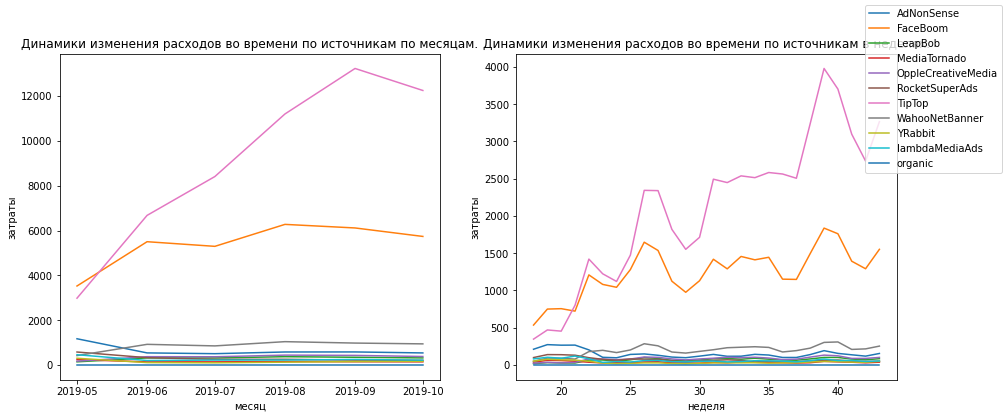

In [48]:
pivot1 = profiles.pivot_table(index = 'month', columns = 'channel', values = 'acquisition_cost', aggfunc = 'sum')
pivot2 = profiles.pivot_table(index = 'week', columns = 'channel', values = 'acquisition_cost', aggfunc = 'sum')


fig, axs = plt.subplots(1, 2, figsize=(15,6))
axs[0].plot(pivot1)
axs[1].plot(pivot2)
fig.legend(pivot1.columns)
axs[0].set_xlabel('месяц')
axs[0].set_ylabel('затраты')
axs[1].set_xlabel('неделя')
axs[1].set_ylabel('затраты')
axs[0].set_title('Динамики изменения расходов во времени по источникам по месяцам.')
axs[1].set_title('Динамики изменения расходов во времени по источникам в неделях.')
plt.show()

In [49]:
pivot2

channel,AdNonSense,FaceBoom,LeapBob,MediaTornado,OppleCreativeMedia,RocketSuperAds,TipTop,WahooNetBanner,YRabbit,lambdaMediaAds,organic
week,,,,,,,,,,,
18,211.05,535.7,16.80,38.64,24.00,99.450,347.0,49.2,52.20,81.6,0.0
19,273.00,750.2,31.71,61.68,34.50,139.230,470.0,92.4,75.90,103.2,0.0
20,265.65,755.7,26.67,59.04,27.50,138.060,454.0,90.0,69.30,90.4,0.0
21,266.70,722.7,26.67,50.16,34.25,131.040,801.8,79.2,65.40,119.2,0.0
22,202.65,1208.9,65.52,36.96,81.75,97.695,1421.2,179.4,49.80,83.2,0.0
23,102.90,1081.3,66.99,27.60,79.50,76.050,1223.6,196.8,25.80,35.2,0.0
24,96.60,1042.8,52.29,29.76,71.50,63.180,1121.0,166.2,17.46,45.6,0.0
25,141.75,1280.4,68.46,32.16,79.75,80.730,1474.4,201.6,22.14,40.0,0.0
26,148.05,1647.8,99.75,40.56,107.00,78.260,2343.6,285.0,27.90,59.2,0.0


На графике четко видно, что вся реклама состредоточена на двух платформах Тип и Фейс.

Теперь посмотрим сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

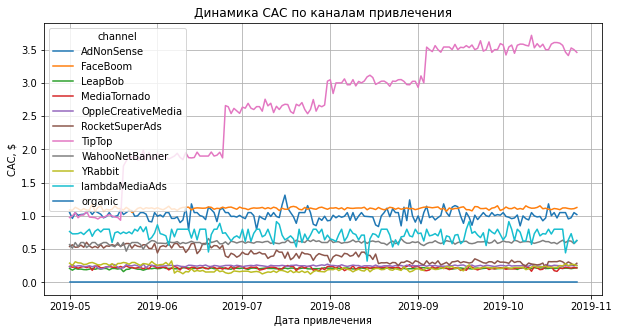

In [50]:
profiles.pivot_table( index = 'dt',
    columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

А вот это уже интересно. Если стоимость привлечения клиентов для большинства площадок стабильна и не превышает 1 у.е. , то с Тик-Ток что-то не то. Мы с каждым месяцем платим все больше и больше. Мы вообще окупаемся?

In [51]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,
)





max_acquitision_dt = ltv_raw['dt'].max()

ltv_profiles = profiles.query('dt <= @max_acquitision_dt')


ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac.sort_values(by='cac' , ascending = False )

,cac
channel,
TipTop,2.757774
FaceBoom,1.113419
AdNonSense,1.008023
lambdaMediaAds,0.727237
WahooNetBanner,0.601856
RocketSuperAds,0.417431
OppleCreativeMedia,0.249908
MediaTornado,0.219035
YRabbit,0.217087


In [52]:
cac = (
    profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

cac.sort_values(by='cac' , ascending = False )

,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


Выводы по затратам на маркетинг.

Общие затраты на маркетинг составили 105 497, половину из них приходится на ТипТоп , далее Фейс, 3-е и последующие места заметно отстают.

Мы четко видим, что вся реклама сосредоточена на двух платформах Тип и Фейс.

Но при этом если стоимость привлечения клиентов для большинства площадок стабильна и не превышает 1 у.е. , то с Тик-Ток что-то не то. Мы с каждым месяцем платим все больше и больше.


### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [53]:
profiles = profiles.query('channel != "organic"')

Создадим таблицу для LTV с разбивкой по каналам привлечения и построим график.

Посмотрим на показатели в целом по нашему приложению.

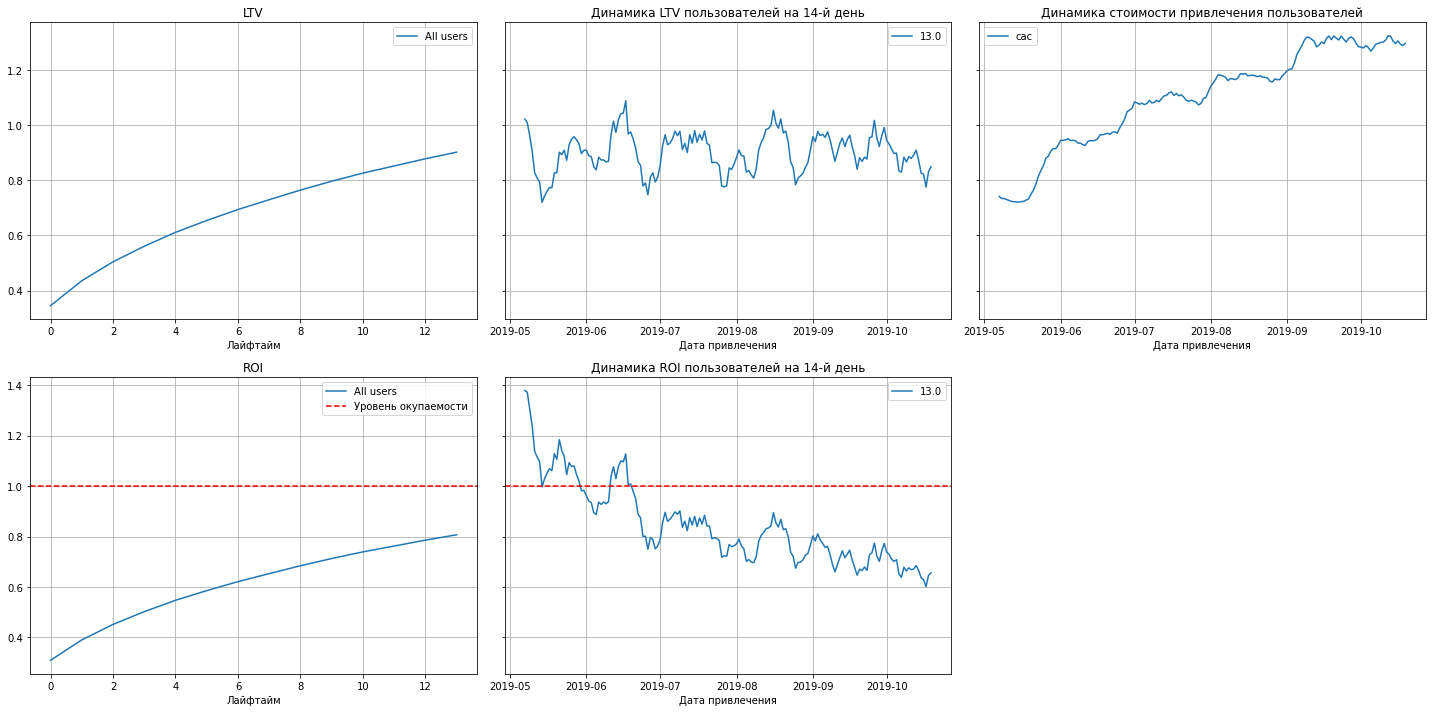

In [54]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days,
)

plot_ltv_roi(ltv , ltv_history, roi, roi_history, 14 , window=7)

LTV хоть и растет, но стоимость привлечения клиентов пугаеюще стремится вверх. Из-за этого окупаемость упала ниже 0. До июля все было хорошо, потом что-то пошло не так.

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.505030,0.589149,0.644417,0.683509,0.706694,0.732582,0.754149,0.767628,0.789203,0.802682,0.806996,0.815084,0.827215,0.838006
FaceBoom,27544,0.585703,0.660825,0.700722,0.728842,0.747143,0.760369,0.774718,0.784757,0.792404,0.800775,0.806247,0.812226,0.817483,0.821469
LeapBob,8103,0.107048,0.155702,0.205583,0.235391,0.259654,0.288599,0.314587,0.333802,0.369543,0.394176,0.417579,0.437902,0.457608,0.473004
MediaTornado,4167,0.137485,0.191615,0.246943,0.293667,0.332249,0.366979,0.388534,0.418474,0.440034,0.461589,0.485541,0.508294,0.526256,0.533684
OppleCreativeMedia,8139,0.097239,0.131578,0.171686,0.206636,0.241103,0.266240,0.290152,0.309527,0.328544,0.346938,0.364228,0.376613,0.395017,0.409118
RocketSuperAds,4251,0.207570,0.318640,0.396114,0.455980,0.515613,0.571019,0.639125,0.687255,0.737986,0.790118,0.831437,0.864307,0.898586,0.933801
TipTop,18498,0.343550,0.497389,0.624141,0.739834,0.842358,0.935707,1.013676,1.096450,1.171400,1.245485,1.311417,1.371467,1.427640,1.487908
WahooNetBanner,8082,0.191302,0.291477,0.378921,0.443754,0.516862,0.569469,0.631870,0.678176,0.725353,0.765488,0.812535,0.849334,0.889472,0.918615
YRabbit,4102,0.163301,0.213423,0.256000,0.303932,0.356265,0.387894,0.414656,0.438988,0.460885,0.480349,0.502245,0.524147,0.546287,0.559668


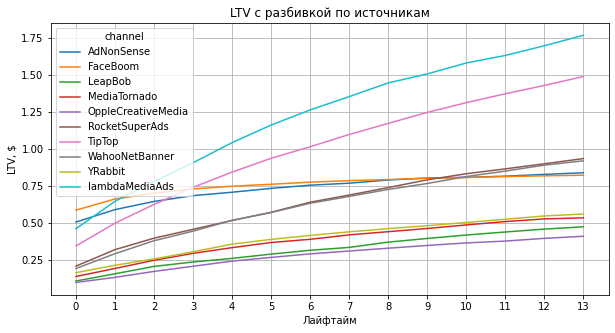

In [55]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)


display(ltv)


report = ltv.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))
plt.title('LTV с разбивкой по источникам')
plt.ylabel('LTV, $')
plt.xlabel('Лайфтайм')
plt.show()

Клиенты привлеченные ТикТоп стали приносить до  1,5 у.е. , а ведь реклама на них стоит дороже. А вот клиенты из лямбда намного прибыльнее для компании при доходе 1,75 затраты на них в стреднем 0,75 у.е. А туда ли мы вкладываемся в рекламу?

Посмотрим окупаемость рекламы с помощью ROI

In [56]:
max_acquitision_dt = ltv_raw['dt'].max()

ltv_profiles = profiles.query('dt <= @max_acquitision_dt')


ltv_profiles.groupby('dt').agg({'user_id': 'nunique'})

cac = (
    ltv_profiles.groupby('channel')
    .agg({'acquisition_cost': 'mean'})
    .rename(columns={'acquisition_cost': 'cac'})
)

roi = ltv.div(cac['cac'], axis=0)

roi = roi[~roi['cohort_size'].isin([np.inf])]

roi.loc[:, 'cohort_size'] = ltv['cohort_size']

roi

,cohort_size,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
channel,,,,,,,,,,,,,,,
AdNonSense,3702,0.501010,0.584460,0.639288,0.678069,0.701069,0.726752,0.748147,0.761519,0.782922,0.796294,0.800573,0.808597,0.820631,0.831337
FaceBoom,27544,0.526040,0.593510,0.629343,0.654599,0.671035,0.682914,0.695801,0.704818,0.711685,0.719204,0.724119,0.729488,0.734210,0.737790
LeapBob,8103,0.509752,0.741436,0.978967,1.120908,1.236450,1.374282,1.498034,1.589535,1.759730,1.877030,1.988470,2.085248,2.179087,2.252399
MediaTornado,4167,0.627684,0.874814,1.127410,1.340729,1.516873,1.675432,1.773841,1.910531,2.008962,2.107371,2.216726,2.320602,2.402610,2.436519
OppleCreativeMedia,8139,0.389100,0.526504,0.686996,0.826849,0.964769,1.065354,1.161037,1.238564,1.314661,1.388265,1.457448,1.507006,1.580649,1.637075
RocketSuperAds,4251,0.497256,0.763336,0.948932,1.092347,1.235204,1.367935,1.531090,1.646391,1.767923,1.892809,1.991795,2.070538,2.152657,2.237019
TipTop,18498,0.124575,0.180359,0.226321,0.268272,0.305449,0.339298,0.367570,0.397585,0.424763,0.451627,0.475535,0.497310,0.517679,0.539532
WahooNetBanner,8082,0.317853,0.484298,0.629588,0.737309,0.858780,0.946188,1.049868,1.126808,1.205193,1.271878,1.350049,1.411192,1.477881,1.526304
YRabbit,4102,0.752238,0.983122,1.179250,1.400049,1.641119,1.786814,1.910094,2.022179,2.123045,2.212703,2.313569,2.414457,2.516446,2.578086


Таблица ROI готова, теперь посотрим график ROI с разбивкой по каналам привлечения.

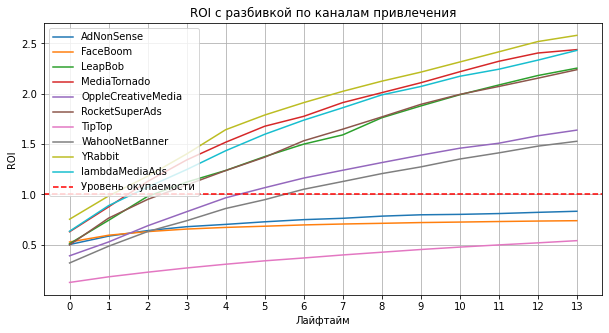

In [57]:
report = roi.drop(columns=['cohort_size'])
report.T.plot(grid=True, figsize=(10, 5), xticks=list(report.columns.values))

plt.title('ROI с разбивкой по каналам привлечения')
plt.ylabel('ROI')
plt.xlabel('Лайфтайм')
plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
plt.legend()
plt.show()

И опять Тик и Фейс не входят в уровень окупаемости, хотя туда вбухали больше всего денег. Лучше всего показывает результаты Лямбда и МедиаТорнадо.

Теперь выведем графики показателей  LTV и ROI по каналам, а так же показателей в динамике.

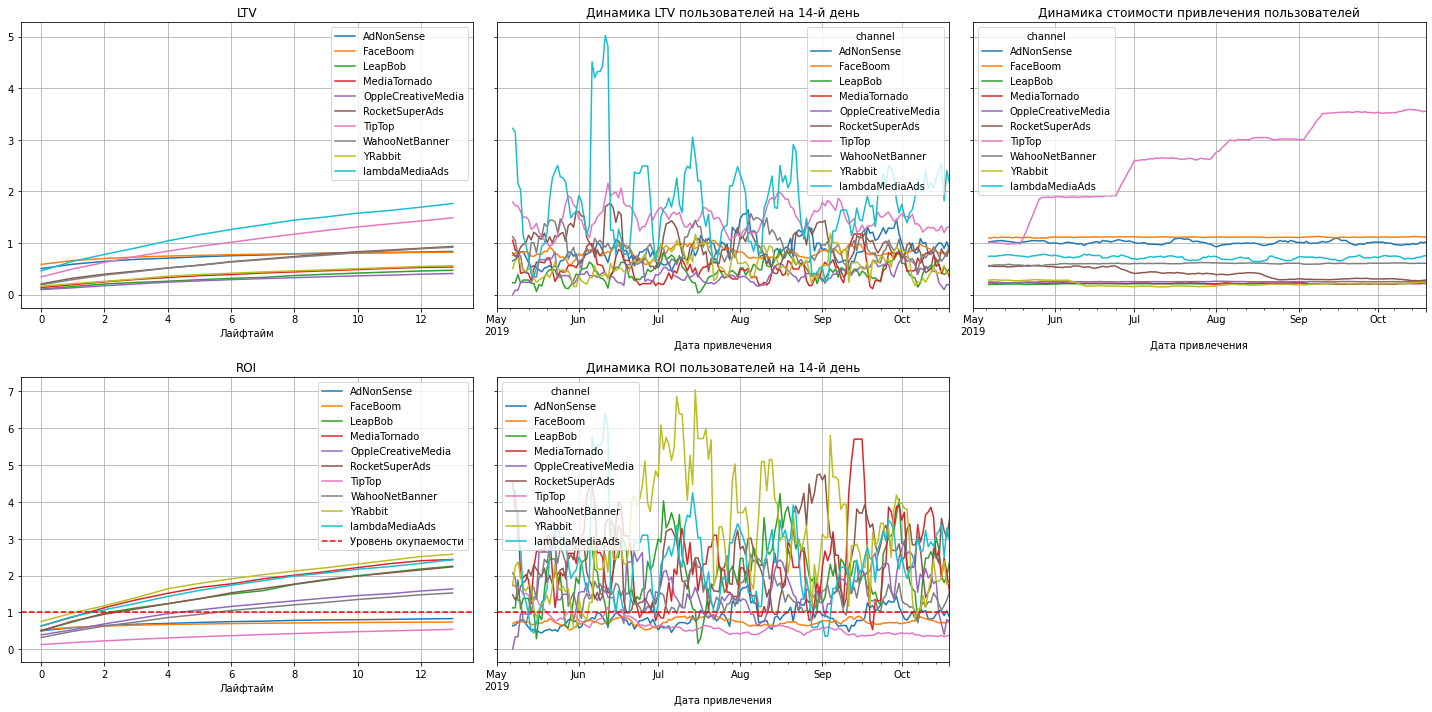

In [58]:
min_date = datetime(2019, 5, 1)
max_date = datetime(2019, 10, 27)
days_num = (max_date - min_date).days
daily_costs = []
for index, values in ad_costs.iterrows():
    channel_name = values['channel']
    channel_costs = values['costs']
    avg_channel_costs = channel_costs / days_num
    for i in range(days_num):
        current_day = min_date + timedelta(days=i)
        daily_costs += [[current_day, channel_name, avg_channel_costs]]
daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
daily_costs['dt'] = daily_costs['dt'].dt.date

# получаем профили с CAC
users = get_profiles(sessions, orders, ad_costs)

# считаем LTV и ROI с разбивкой по устройствам
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['channel']
)

plot_ltv_roi(ltv , ltv_history, roi, roi_history, 14 , window=7)

Итак , что можно сказать по источникам LTV - лидирует Лямбда, второе место Тик. У Тик со временем очень выросла стоимость привлечения клиента, ROI не окупается опять же у Тик и Фейс.

Посмотрим эти показатели по девайсам.

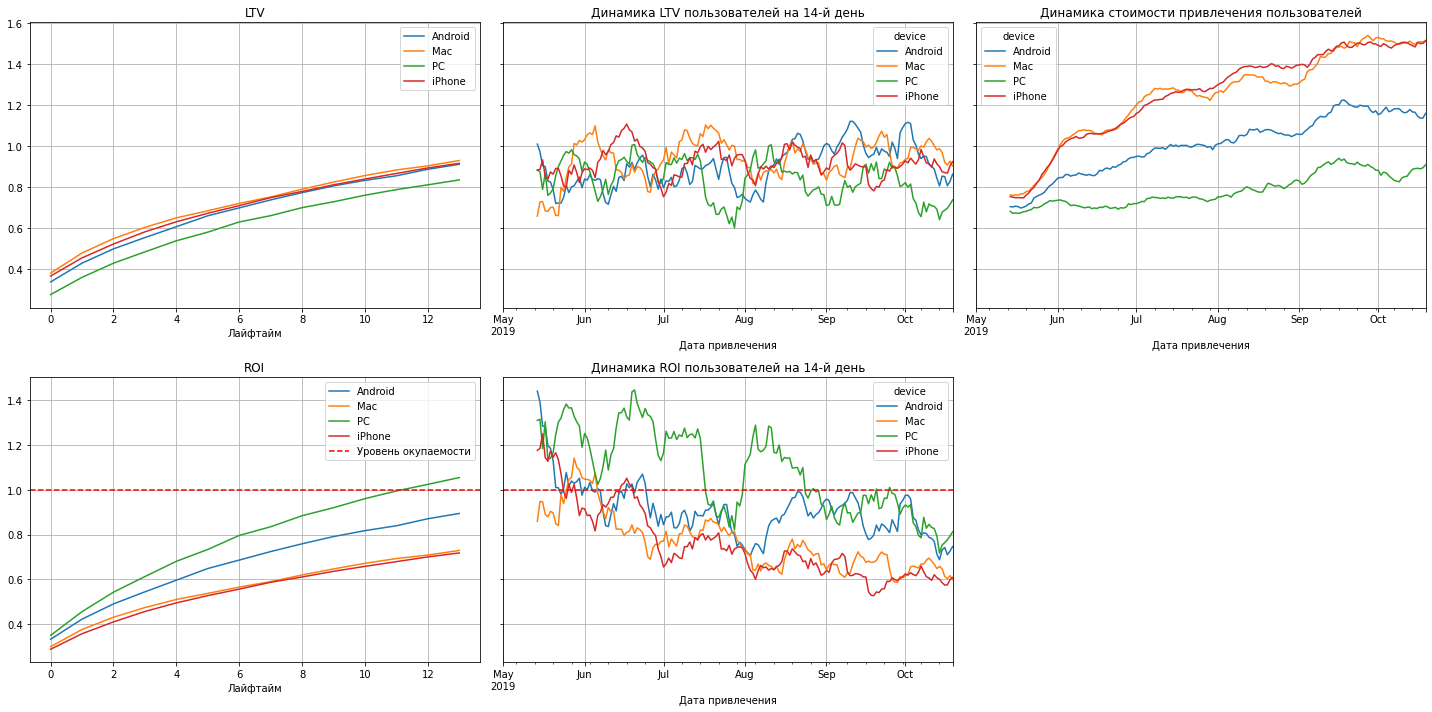

In [59]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, datetime(2019, 11, 1).date(), 14, dimensions=['device']
)

plot_ltv_roi(ltv , ltv_history, roi, roi_history, 14 , window=14)

Итак, LTV для всех устройств примерно на уровне, нет каких-то выделяющихся значений. А вот САС для Макс и Айфонов явно выше, чем Андройд и самая низкая у РС пользователей. ROI показывает, что только РС  окупаются, а вот яблочники и Андройд нет.

Далее выведем графики окупаемости рекламы по странам.

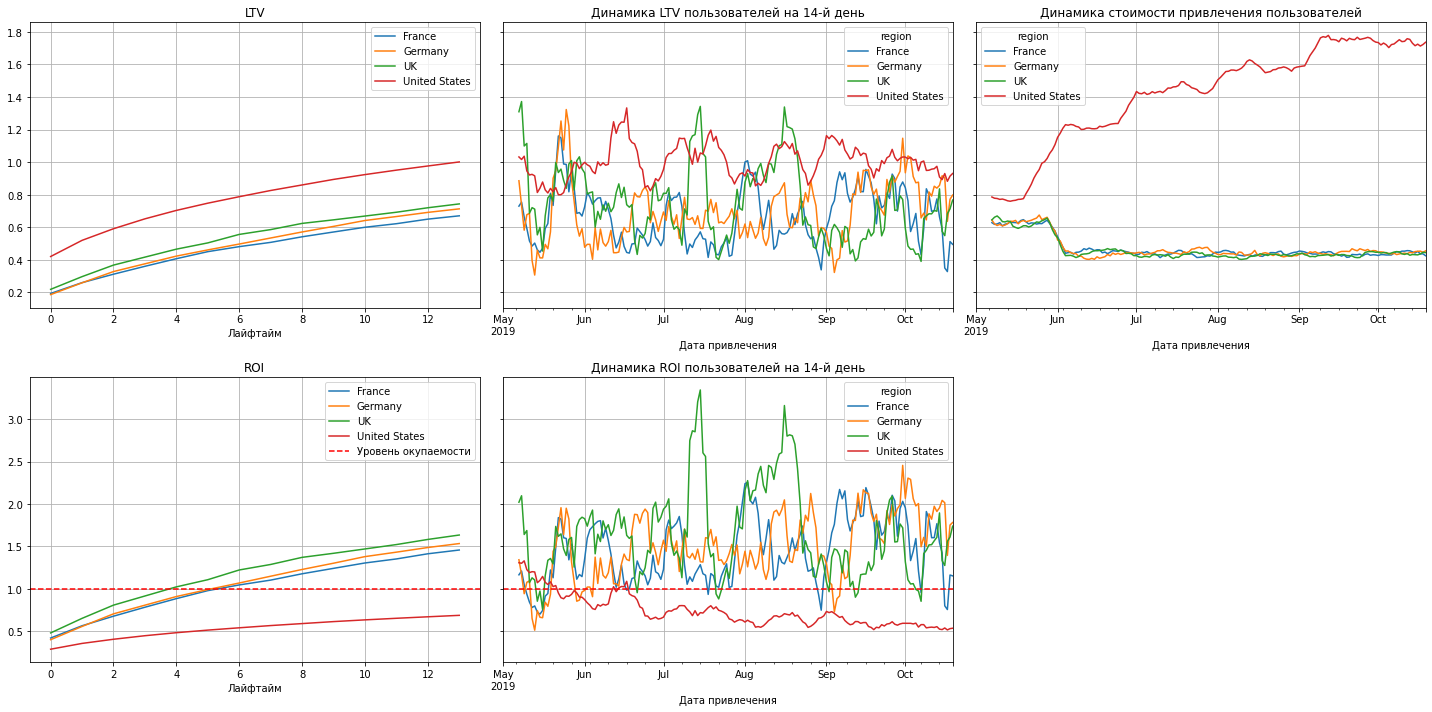

In [60]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

plot_ltv_roi(ltv , ltv_history, roi, roi_history, 14 , window=7)

Тут на всех графиках Америка явно бросается в глаза. У нее хоть LTV и выше остальных, но стоимость привлечения клиентов зашкаливает, то же самое и с ROI, только Америка не окупилась.

Теперь посчитаем конверсию и удержание, может быть это даст еще более точную картинку нам.

Посчитаем и визуализируем конверсию по устройствам

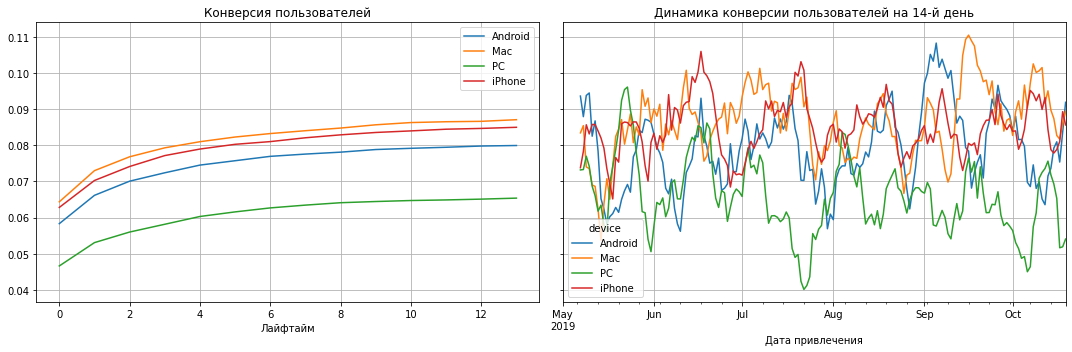

In [61]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия для Яблочников выше, чем у андройда и РС. Причем РС имеет явно ниже показатель.

Посмотрим тогда удержание по устройствам.

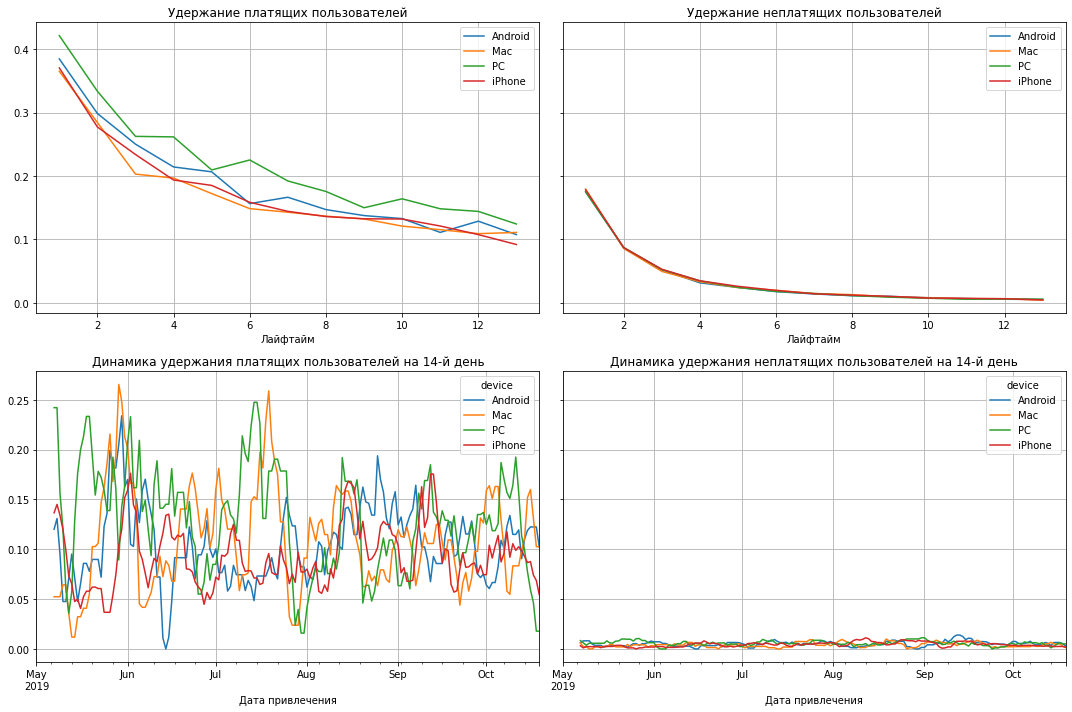

In [62]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Хоть на РС ниже конверсия, зато удержание выше. Так же андройд превосходит яблочников. Пользователи, которые не платят, все как 1 , любое утройство и к концу лайфтайма их нет. По динамике - самые стабильные это пользователи айфонов, но они же самые низкие, мак хоть и прыгает туда-сюда, но он ниже андройда. Показания РС до июня были выше , потом они сравнялись с маком, но на некоторых промежутках все равно лидируют.

Теперь посчитаем и визуализируем конверсию по странам

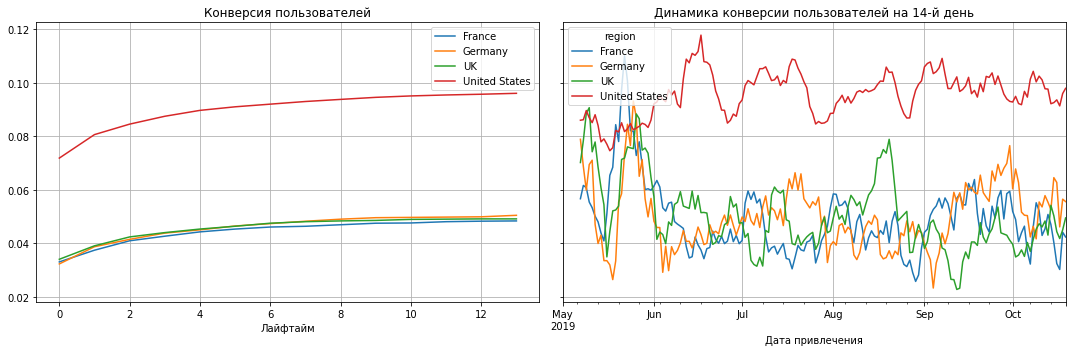

In [63]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Тут Америка по конверсии явно лидирует.

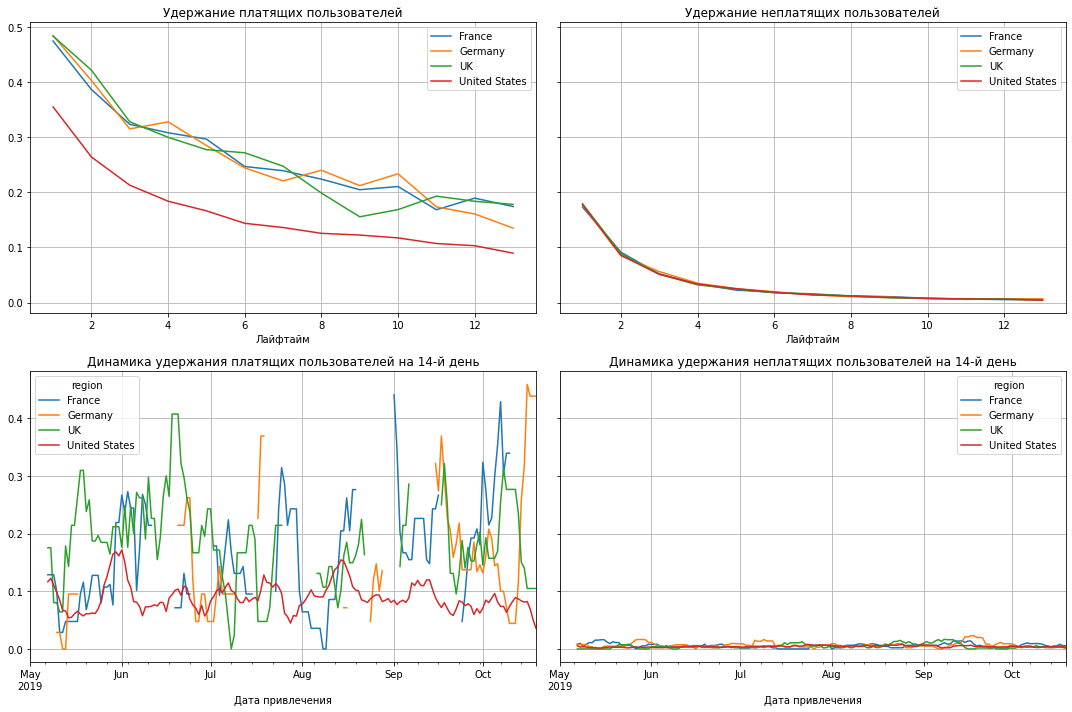

In [64]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В удержании Америка так же лидер, только с конца. Все приходят посмотреть благодаря рекламе, но не задерживаются.

Тогда проверим эти показатели еще по каналу привлечения.

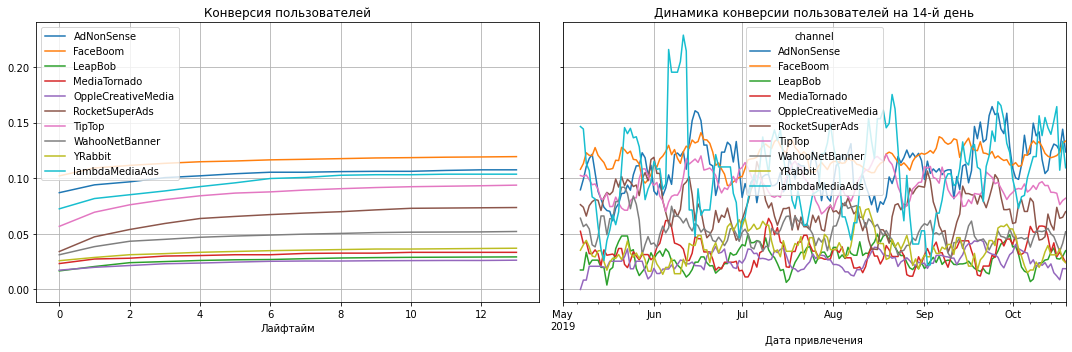

In [65]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Фейс и Тик хороши, но и Лямбда , которая имеет хорошие показатели в конверсии на 3 месте.

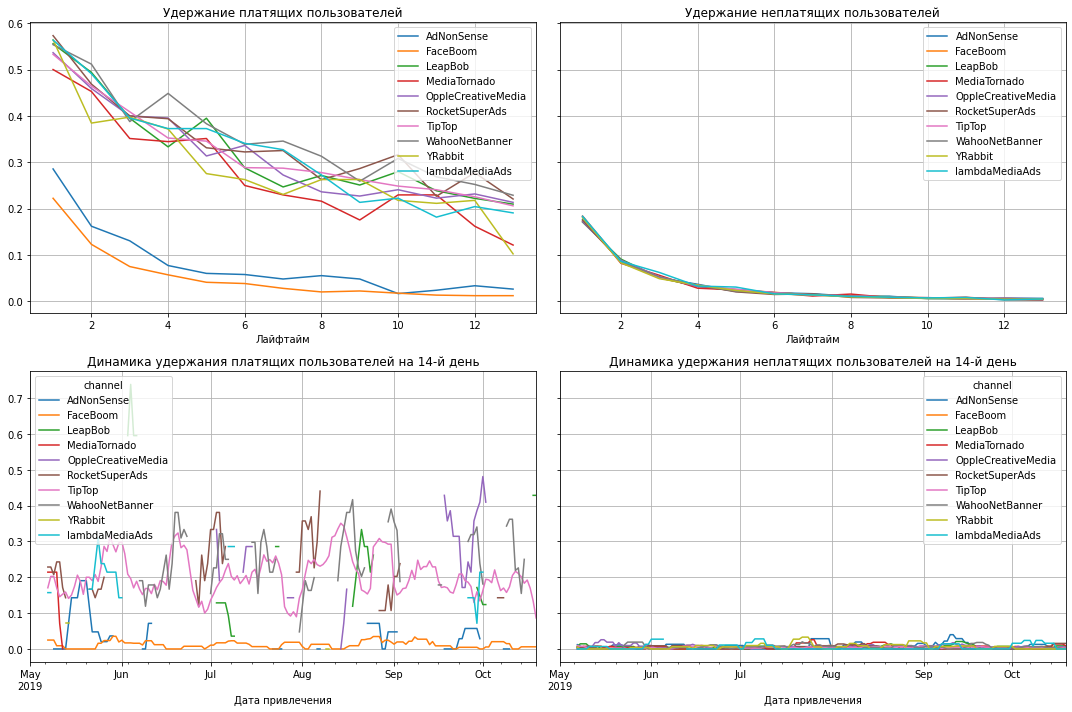

In [66]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, sessions, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Хуже всего удержание у Фейс, там реально какие-то ротозеи. А вот Тик середячок.

Что мы из всего этого узнали.

Реклама, направленная на привлечение пользователей в целом не окупается, они близка к себестоимости, но немного не дотягивает.

Негативное влияние на окупаемость я вижу в большой стоимости привлечения через ТипТоп, страна при этом лидер - Америка, на устройствах айфон и мас.

Проблемы окупаемости в том, что не смотря на рекламу, конверсия у этих устройств выше , чем у андройда и РС, зато удержание ниже, соответсвенно денег по факту клиенту приносят компании меньше.

Конверсия для Яблочников выше, чем у андройда и РС. Причем РС имеет явно ниже показатель.

Хоть на РС ниже конверсия, зато удержание выше. Так же андройд превосходит яблочников. Пользователи, которые не платят, все как 1 , любое утройство и к концу лайфтайма их нет. По динамике - самые стабильные это пользователи айфонов, но они же самые низкие, мак хоть и прыгает туда-сюда, но он ниже андройда. Показания РС до июня были выше , потом они сравнялись с маком, но на некоторых промежутках все равно лидируют.

По конверсии Америка явный лидер, при этом удержание хуже всего. 

С точки зрения конверсии через каналы Фейс и Тик хороши, но и Лямбда , которая имеет хорошие показатели в конверсии на 3 месте.

Хуже всего удержание у Фейс, там реально какие-то ротозеи. А вот Тик середячок.



Итак, по графику ROI  по каналам, действительно 3 канала не окупаются.

Это AdNonSense, FaceBoom и TipTop.

Первое, что мы видим это САС , динамика стоимости привлечения в этих 3 каналах самая дорогая.

По конверсии видно, что маркетологи не зря старались и показатели этих 3-х каналов выше других.

Но вот удержание ниже остальных.

Соответственно затрачены большие деньги по привлечению, но само приложение их не удержало. И их деятельность не перешла в качество – LTV.


In [67]:
profiles.groupby(['region', 'channel']).agg({'channel': ['count']}).reset_index()

region             channel       
                                       count
0          France          AdNonSense   1366
1          France             LeapBob   2988
2          France  OppleCreativeMedia   2991
3          France      WahooNetBanner   2971
4          France      lambdaMediaAds    742
5         Germany          AdNonSense   1219
6         Germany             LeapBob   2519
7         Germany  OppleCreativeMedia   2562
8         Germany      WahooNetBanner   2579
9         Germany      lambdaMediaAds    649
10             UK          AdNonSense   1295
11             UK             LeapBob   3046
12             UK  OppleCreativeMedia   3052
13             UK      WahooNetBanner   3003
14             UK      lambdaMediaAds    758
15  United States            FaceBoom  29144
16  United States        MediaTornado   4364
17  United States      RocketSuperAds   4448
18  United States              TipTop  19561
19  United States             YRabbit   4312

Основная причина неокупаемостии - неэффективная рекламная кампания в США. Там в качестве основных каналов рекламы используются неэффективные TipTop и FaceBoom (в Европе данных каналы не используются). TipTop не окупается в связи с высокой стоимостью рекламы, а FaceBoom - в связи с низким удержанием пользователей. 
    
Пользователи устройств Apple имеют более низкие показатели окупаемости и удержания как раз потому, что эти устройства в основном используются в США. Если посмотреть отдельно Европу, там пользователи этих устройств не будут выглядеть хуже, чем пользователи других устройств. 
    
Но при этом в США есть и каналы с хорошими показателями окупаемости. Остальных три канала, используемые в стране, окупаются уже на второй-третий день. Поэтому нам стоит пересмотреть выбор рекламных каналов в США.
    

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

В первую очередь моя рекомендация поработать с Тип-Топ, почему такое дорогое привлечение пользователей стало. 

Так же поработать над удержанием Фейс пользователей, у них хорошая конверсия, но удержание на нуле.

Причем смотреть конктретно рынок Америки для владельцев яблок и каналов привлечения Тип_Топ и Фейс.

Далее переориентация на рекламу из источника ЛямбдаМедиа, у нее очень хорошие показатели САС и ROI.

После капаем в конверсии РС и андройд, нужно понять, почему она меньше, если сравняем эти показатели, то согласно динамике удержания, будем получать за них больше денег.

Соответсвено следующий пунт проверки, это удержание яблочников, нужно выяснить, почему андройд и РС имеют лучший показатель.
Т.к. владедьцы яблок платят больше, соответсвенно их удержание сразу даст эффект.

Так же нужно поработать с источниками привлечения по странам, сейчас доля клиентов из Америки  50%, хотя население 3-х Европейских стран 206 млн (Англия, Франция, Германия) против 331 млн Америки , что на 40% всего больше. Но никак не в 2 раза. Есть над чем поработать.

